# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("tic-tac-toe.csv")

for col in df.columns:
    print(df[col].value_counts())

TL
x    418
o    335
b    205
Name: count, dtype: int64
TM
x    378
o    330
b    250
Name: count, dtype: int64
TR
x    418
o    335
b    205
Name: count, dtype: int64
ML
x    378
o    330
b    250
Name: count, dtype: int64
MM
x    458
o    340
b    160
Name: count, dtype: int64
MR
x    378
o    330
b    250
Name: count, dtype: int64
BL
x    418
o    335
b    205
Name: count, dtype: int64
BM
x    378
o    330
b    250
Name: count, dtype: int64
BR
x    418
o    335
b    205
Name: count, dtype: int64
class
True     626
False    332
Name: count, dtype: int64


In [2]:
# Split X and y
X = df.drop(columns='class')
y = df['class']

In [3]:
# Replace values
X.replace({'x': 1, 'o': 0.5, 'b': 0}, inplace = True)
y.replace({'True': 1, 'False': 0}, inplace = True)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,1.003223,-0.167318,-0.286827
1,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,1.084953,-0.286827
2,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-0.167318,1.003223
3,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-1.419590,-1.576877
4,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-1.576877,-0.167318,-1.576877


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

In [7]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import RandomNormal
from keras.regularizers import l2
from keras.optimizers import Adam

initializer = RandomNormal(mean=0., stddev=1., seed=14)

model = Sequential()

model.add(Dense(units = 9, input_dim = X_train.shape[1], activation='relu', kernel_initializer=initializer))

model.add(Dense(units = 6, activation='relu', kernel_initializer=initializer))

model.add(Dense(units = 2, activation='softmax', kernel_initializer=initializer))


# Step 3: Compile the model
optimizer = Adam(lr=0.001)  # You can adjust learning rate and other parameters in Adam() if needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # Error metric to minimize.
              metrics=['accuracy'] # Error metrics to monitor
              )

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 164 (656.00 Byte)
Trainable params: 164 (656.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from keras.callbacks import ModelCheckpoint
# Save model
file_path = './tic-tac-toe'
checkpoint = ModelCheckpoint(
    filepath=file_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)


In [9]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5)

history = model.fit(
    X_train,
    y_train,
    epochs=500, # Number of epochs. The optimal value for this depends heavilly on the dataset and the neural network topology. Try-Error
    validation_split=0.30, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    #batch_size=32, # How many samples to input in the network before updating the weights
    verbose=0, # To display the progress.
    callbacks=[early_stopping, checkpoint]
)


Epoch 1: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 2: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 3: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 4: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 5: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 6: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 7: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 8: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 9: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 10: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 11: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 12: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 13: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 14: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 15: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 16: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 17: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 18: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 19: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 20: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 21: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 22: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 23: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 24: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 25: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 26: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 27: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 28: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 29: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 30: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 31: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 32: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 33: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 34: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 35: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 36: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 37: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 38: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 39: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 40: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 41: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 42: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 43: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 44: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 45: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 46: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 47: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 48: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 49: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 50: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 51: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 52: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 53: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 54: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 55: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 56: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 57: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 58: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 59: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 60: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 61: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 62: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 63: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 64: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 65: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 66: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 67: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 68: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 69: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 70: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 71: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 72: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 73: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 74: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 75: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 76: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 77: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 78: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 79: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 80: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 81: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 82: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 83: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 84: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 85: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 86: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 87: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 88: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 89: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 90: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 91: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 92: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 93: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 94: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 95: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 96: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 97: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 98: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 99: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 100: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 101: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 102: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 103: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 104: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 105: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 106: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 107: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 108: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 109: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 110: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 111: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 112: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 113: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 114: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 115: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 116: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 117: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 118: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 119: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 120: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 121: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 122: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 123: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 124: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 125: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 126: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 127: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 128: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 129: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 130: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 131: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 132: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 133: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 134: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 135: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 136: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 137: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 138: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 139: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 140: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 141: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 142: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 143: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 144: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 145: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 146: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 147: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 148: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 149: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 150: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 151: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 152: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 153: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets



Epoch 154: saving model to ./tic-tac-toe
INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


INFO:tensorflow:Assets written to: ./tic-tac-toe/assets


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

9/9 [==============================] - 0s 667us/step - loss: 0.5878 - accuracy: 0.7222
Test Loss: 0.5878, Test Accuracy: 0.7222


In [11]:
from keras.callbacks import History

def plot_metric(history: History, metric: str):
    '''
    Function to plot the training, and validation loss of a neural network during the training.

    Inputs:
    history: Keras callback with the historical progress

    metric: which metric of the training progress we want to plot

    Outputs:
    None
    '''
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

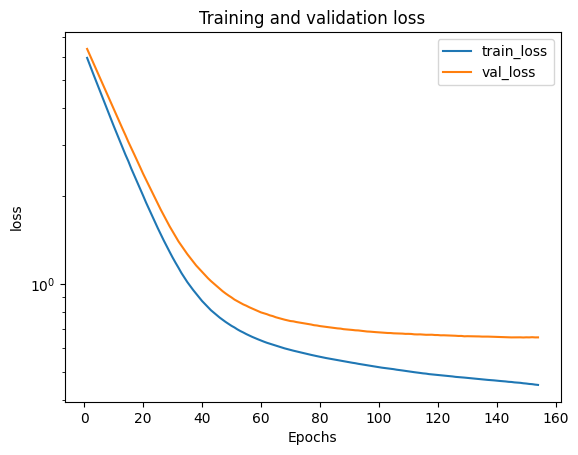

In [12]:
plot_metric(history,'loss')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_performance(y_train: np.array, y_pred_train: np.array,
                      y_test: np.array, y_pred_test: np.array) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.3f}'.format

    errors_train = y_train-y_pred_train
    errors_test = y_test-y_pred_test

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, "Error": errors_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test, "Error": errors_test})

    return performance, df_train, df_test

In [20]:
y_pred_train_nn1 = model.predict(X_train)
y_pred_test_nn1  = model.predict(X_test)

display(X_train)
display(y_pred_train_nn1[0])


 1/21 [>.............................] - ETA: 0s

9/9 [==============================] - 0s 1ms/step


,TL,TM,TR,ML,MM,MR,BL,BM,BR
228,1.003223,-1.419590,1.003223,-0.167318,0.930371,-0.167318,1.003223,-1.419590,-0.286827
319,-0.286827,1.084953,-0.286827,1.084953,0.930371,1.084953,-0.286827,1.084953,-0.286827
715,1.003223,-1.419590,1.003223,-1.419590,0.930371,-1.419590,-0.286827,-0.167318,-0.286827
212,1.003223,-0.167318,-1.576877,-0.167318,0.930371,-1.419590,-0.286827,1.084953,1.003223
79,1.003223,1.084953,-0.286827,1.084953,-0.420077,1.084953,1.003223,-0.167318,-0.286827
...,...,...,...,...,...,...,...,...,...
106,1.003223,1.084953,-1.576877,-0.167318,0.930371,-0.167318,-0.286827,-1.419590,1.003223
270,1.003223,-1.419590,-0.286827,-1.419590,0.930371,-0.167318,-0.286827,1.084953,1.003223
860,-0.286827,-1.419590,1.003223,-0.167318,0.930371,-1.419590,-0.286827,-1.419590,1.003223
435,-0.286827,-1.419590,1.003223,-0.167318,0.930371,-0.167318,1.003223,-1.419590,1.003223


array([0.00250401, 0.99749595], dtype=float32)

In [ ]:
# your code here

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

Modified: epochs, optimizer, number of layers, added dropout layers and regularizers but couldn't get to a lower loss / accuracy